# LCAT: visualise database locally

* Once a local Postgres database has been created, we can visualise the tables contained.

Note: If you make an incorrect postgres transaction, rollback with `plotter.conn.rollback()`.

# Initialise & connect

In [ ]:
import os
import yaml

# The cwd should be the data folder root
os.chdir("..")

In [3]:
config_filepath = "./config.yml"

with open(config_filepath) as f:
    conf = yaml.load(f, Loader=yaml.FullLoader)

In [ ]:
from src.db_plotter import DBPlotter

In [4]:
plotter = DBPlotter(conf)

In [5]:
plotter.connect_to_db()

Connecting using db config from config file...
Connection successful.


## Plot boundaries

* Plot all regions in each boundary shapefile.

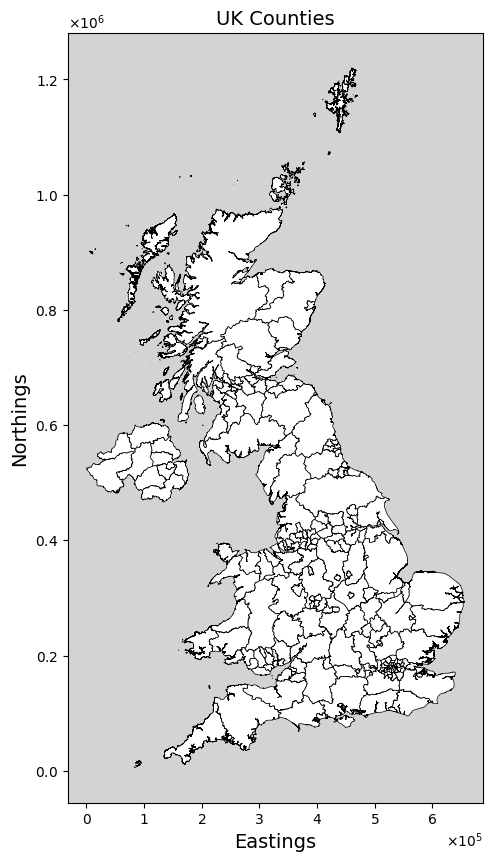

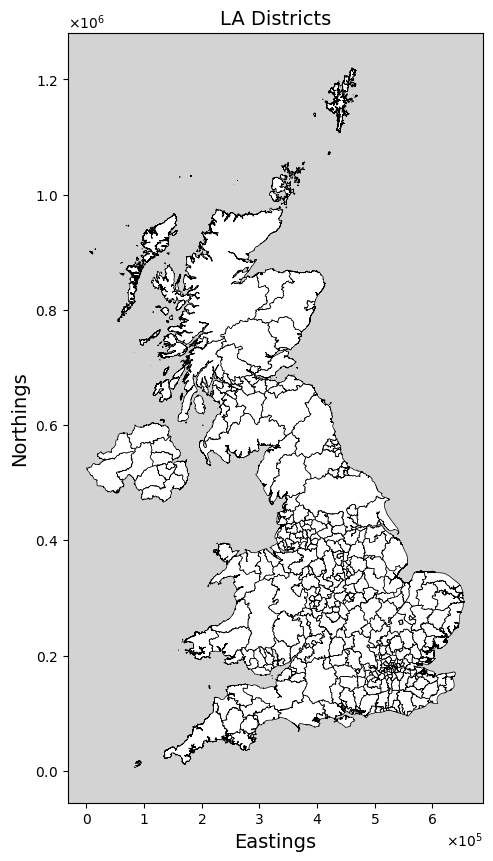

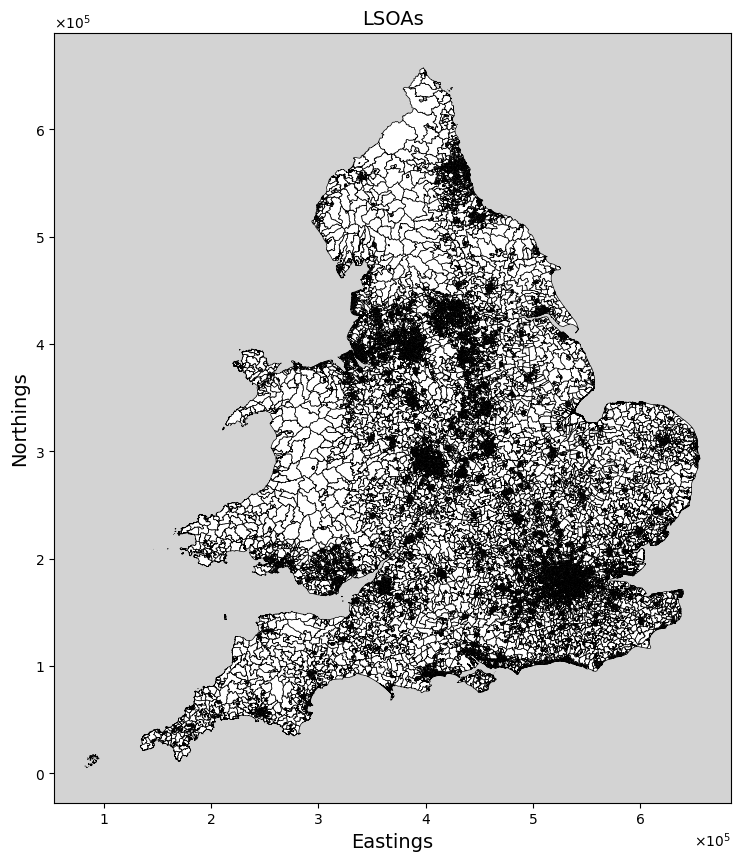

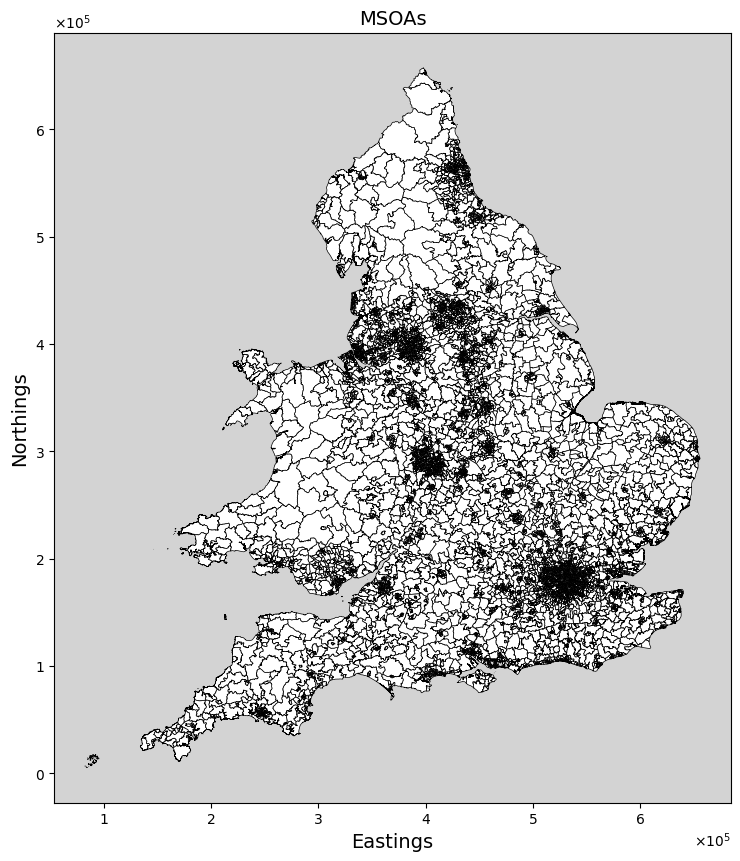

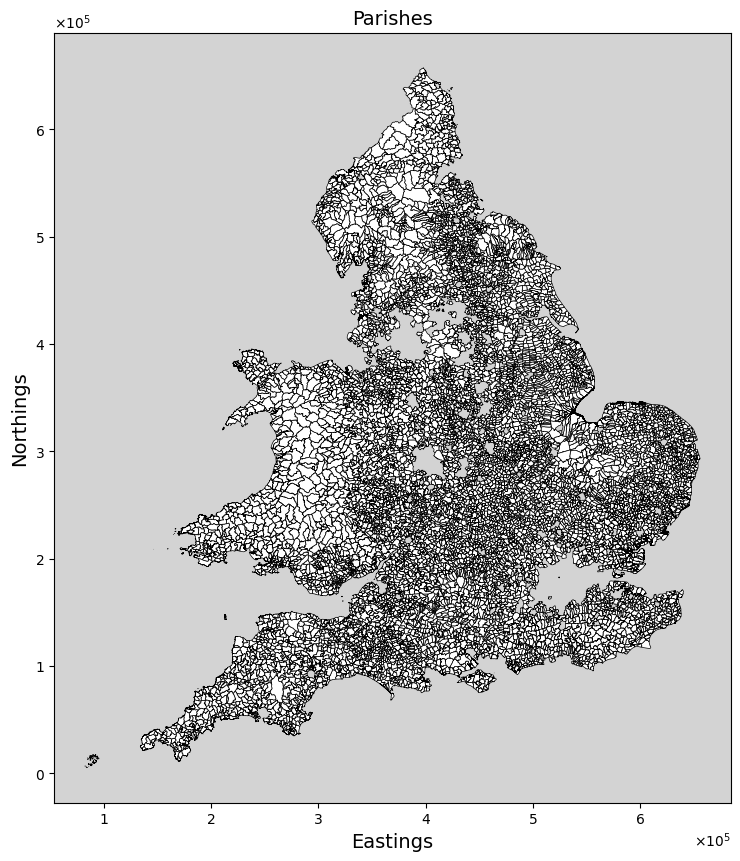

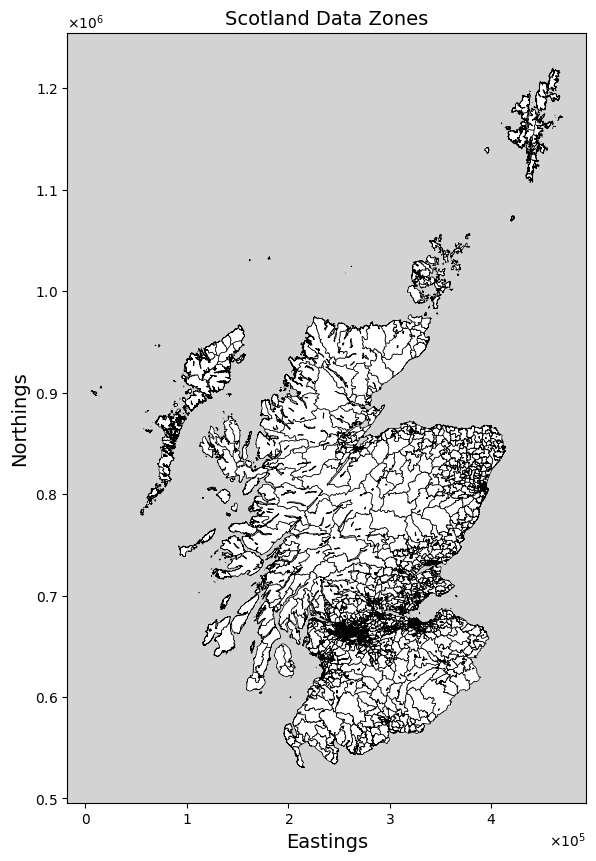

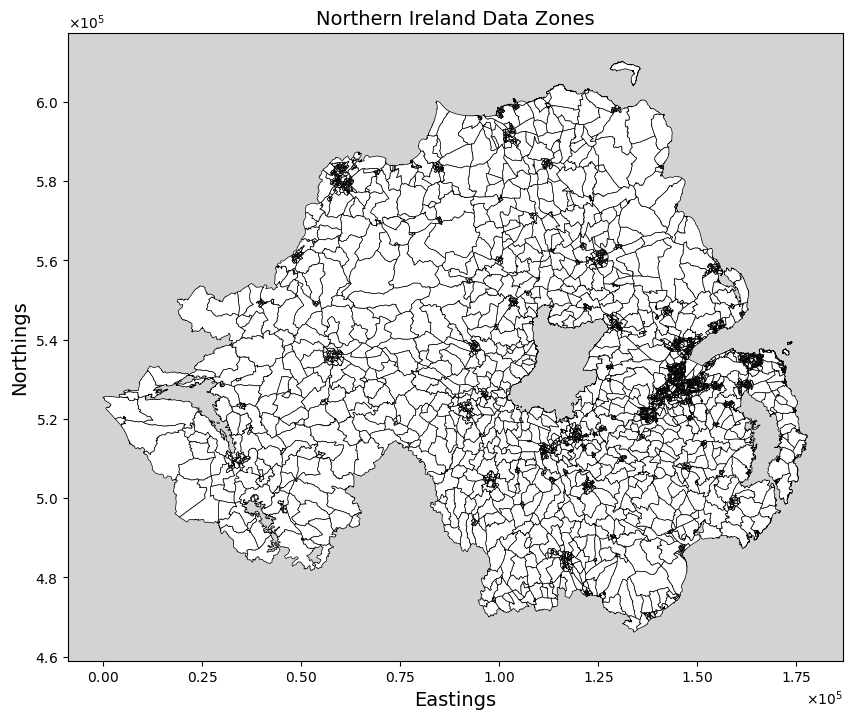

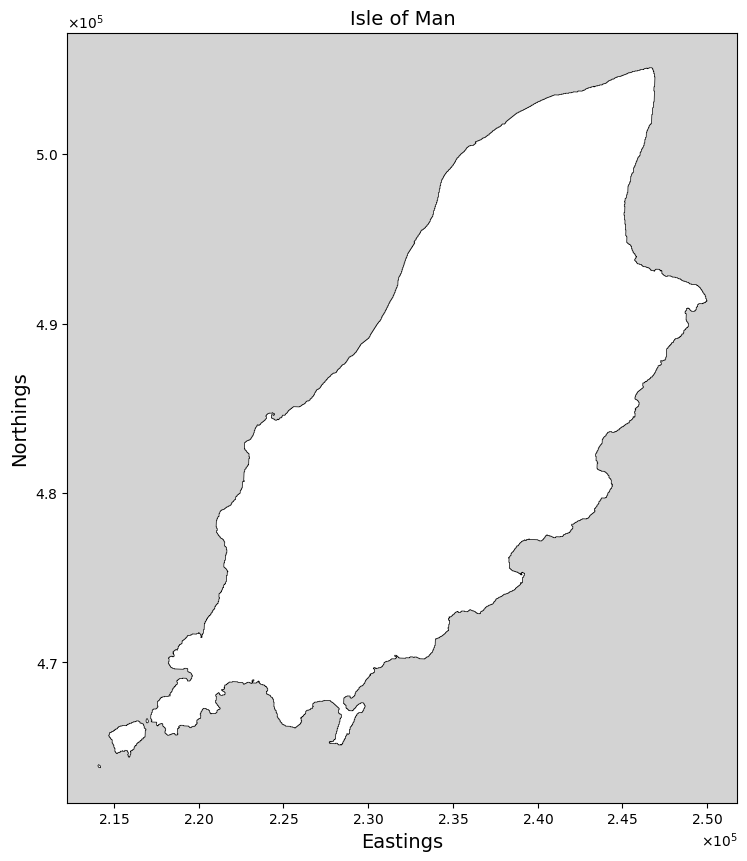

In [6]:
for boundary_identifier in [
    "uk_counties",
    "la_districts",
    "lsoa",
    "msoa",
    "parishes",
    "sc_dz",
    "ni_dz",
    "iom",
    ]:

    plotter.plot_boundary(boundary_identifier)

## Plot CHESS-SCAPE climate data

* Given an RCP, season, variable, and decade, we can plot the climate data in the database.
* The following variables are available to plot:

In [ ]:
rcps = [60, 85] # int
seasons = ["annual", "summer", "winter"] # string
variables = ["pr", "rsds", "sfcWind", "tas", "tasmax", "tasmin"] # string
decades = [1980, 1990, 2000, 2010, 2020, 2030, 2040, 2050, 2060, 2070] # int

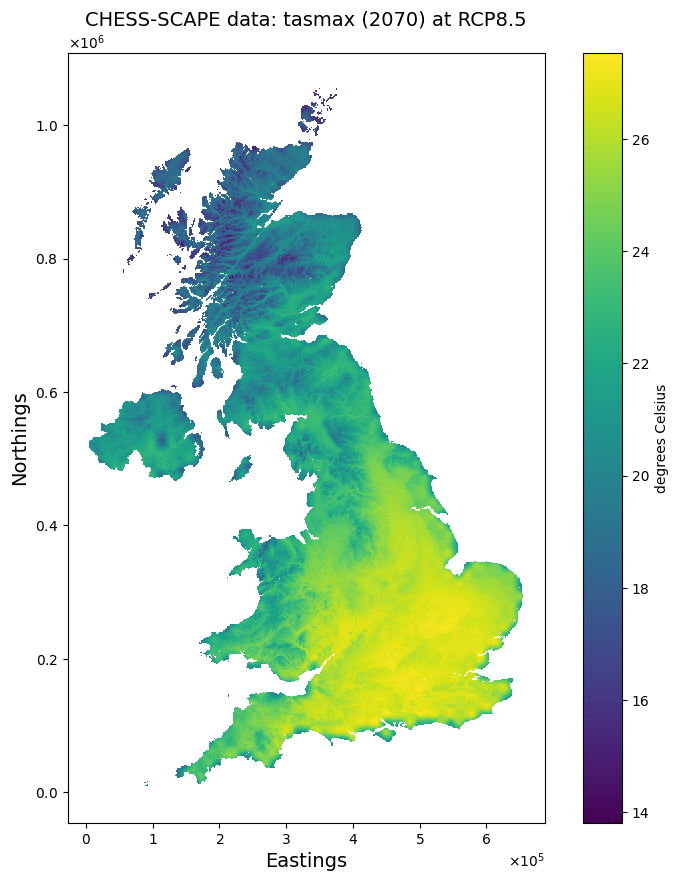

In [8]:
rcp = 85
season = "summer"
variable = "tasmax"
decade = 2070

plotter.plot_chess_grid_and_data(rcp, season, variable, decade)

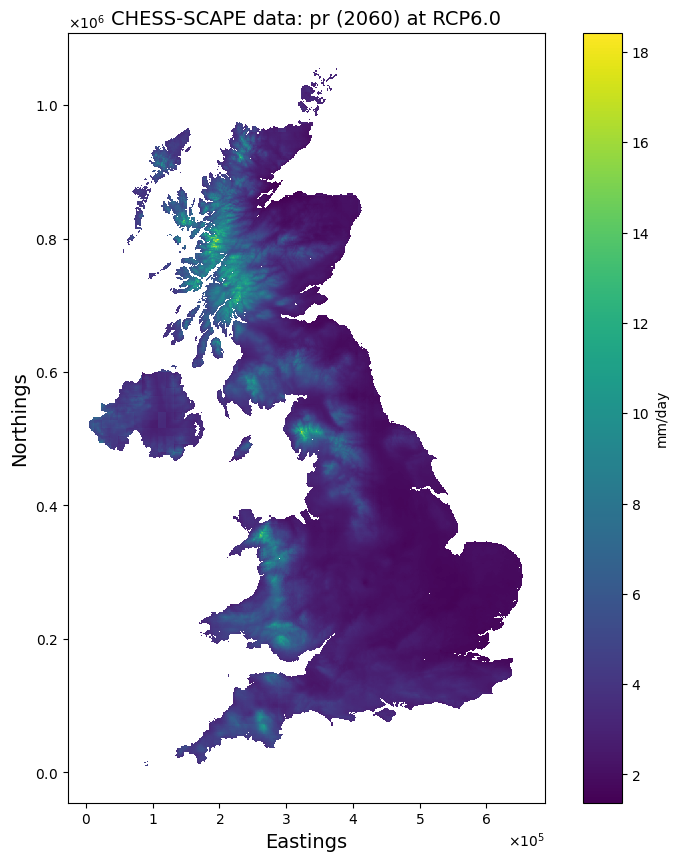

In [9]:
rcp = 60
season = "winter"
variable = "pr"
decade = 2060

plotter.plot_chess_grid_and_data(rcp, season, variable, decade)

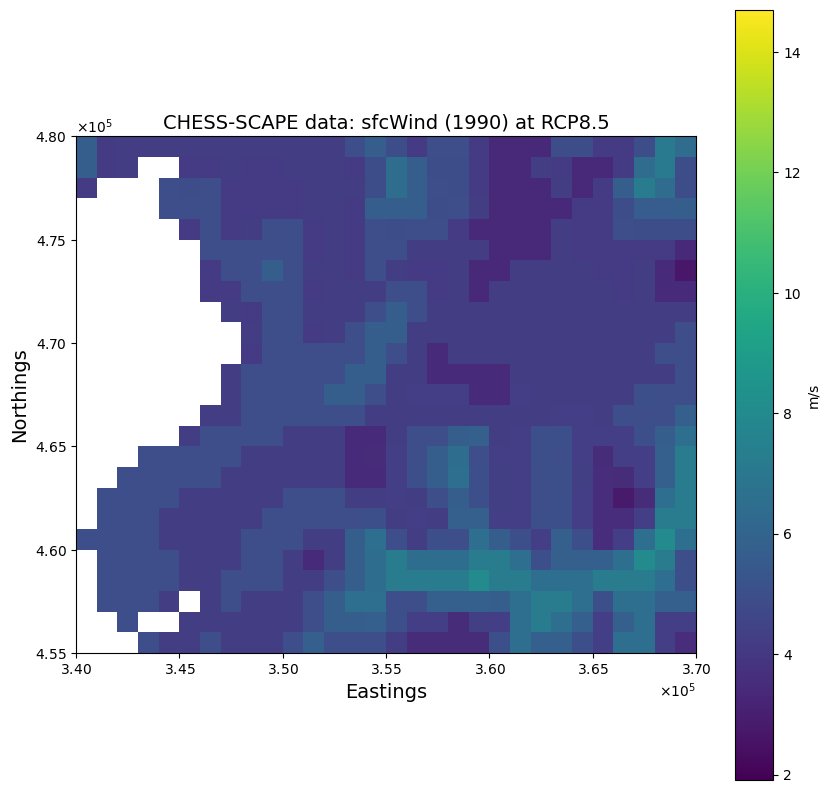

In [10]:
viewbox=[3.4e5, 3.7e5, 4.55e5, 4.8e5]

rcp = 85
season = "winter"
variable = "sfcWind"
decade = 1990

plotter.plot_chess_grid_and_data(rcp, season, variable, decade, viewbox)

## Plot CHESS-SCAPE grid cells

* We can also plot the grid cells themselves without any climate data, showing the boundary region, and the cells they cover.

### Merged

* We merge (take union) of adjacent cells of the same type. The only cell boundary plotted is thus a boundary to other cell types, or to water. This is to avoid the problem of plotting too many cell boundaries, causing the whole plot to become black.

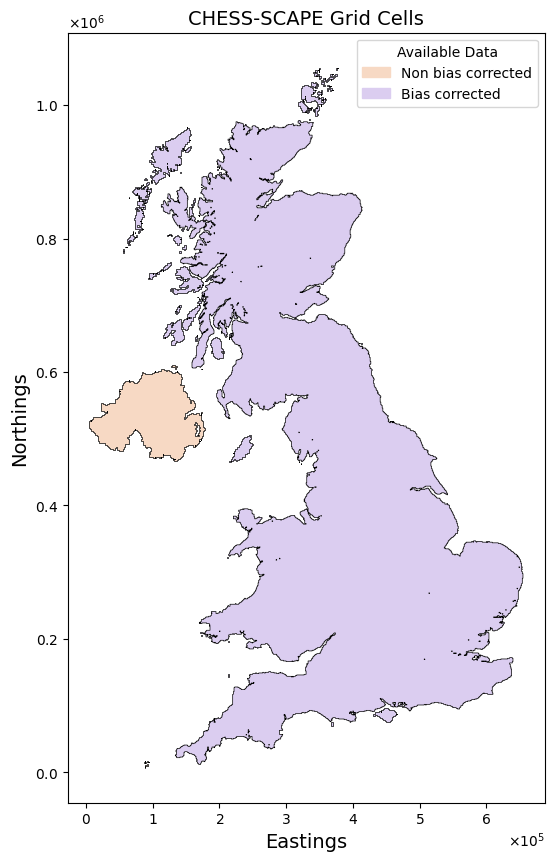

In [11]:
plotter.plot_chess_grid_cells(merged=True)

## Plot region and overlapping cells

* Plot a given region (i.e. Devon county) and the overlapping CHESS-SCAPE grid cells.
* No merging occurs here. All cells are the same dimensions, but this might not look so on your screen due to aliasing issues.

Cells found: 6808


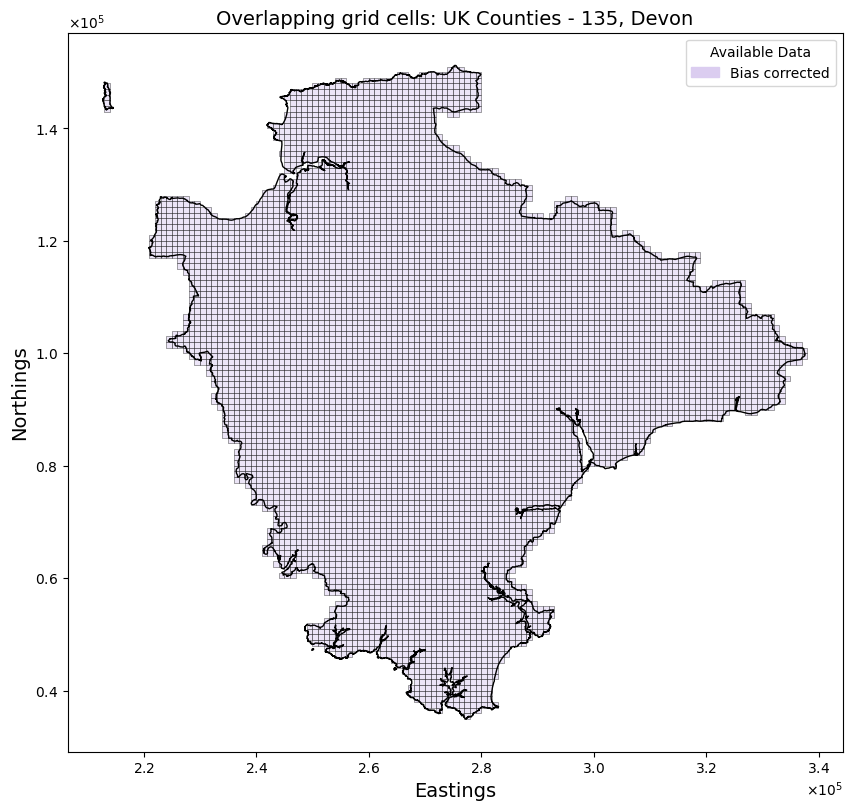

In [12]:
devon_id = 135
plotter.plot_region_and_overlapping_cells("uk_counties", devon_id)

Cells found: 20


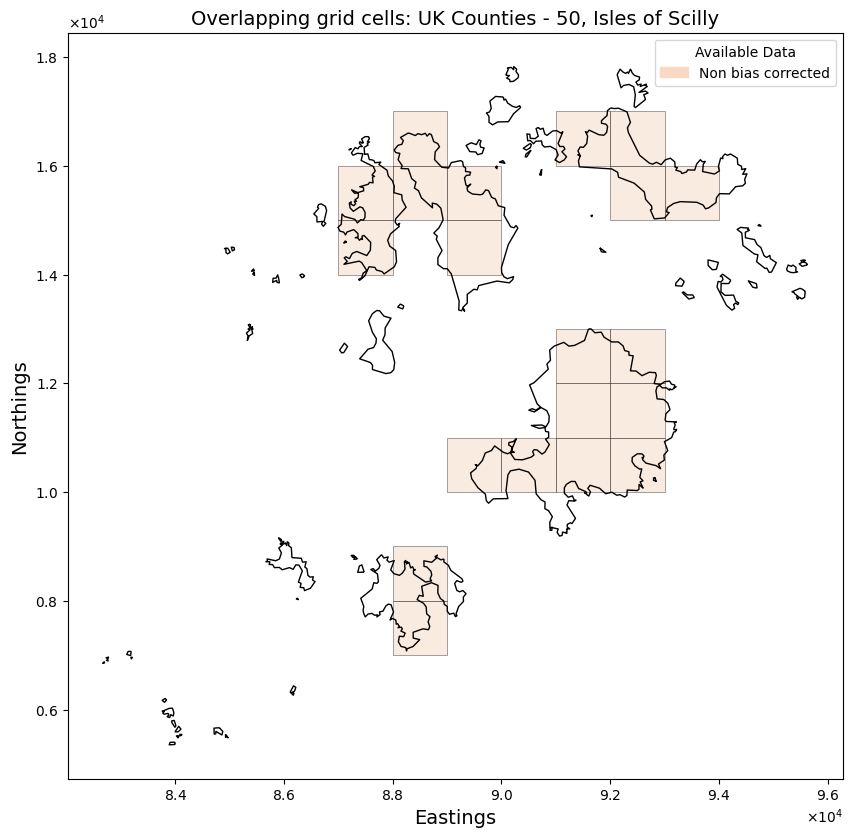

In [13]:
scilly_id = 50
plotter.plot_region_and_overlapping_cells("uk_counties", scilly_id)

## Plot regions with no overlaps

* Some regions have no overlapping cells, generally small regions at the coast.

8 no overlap regions found.


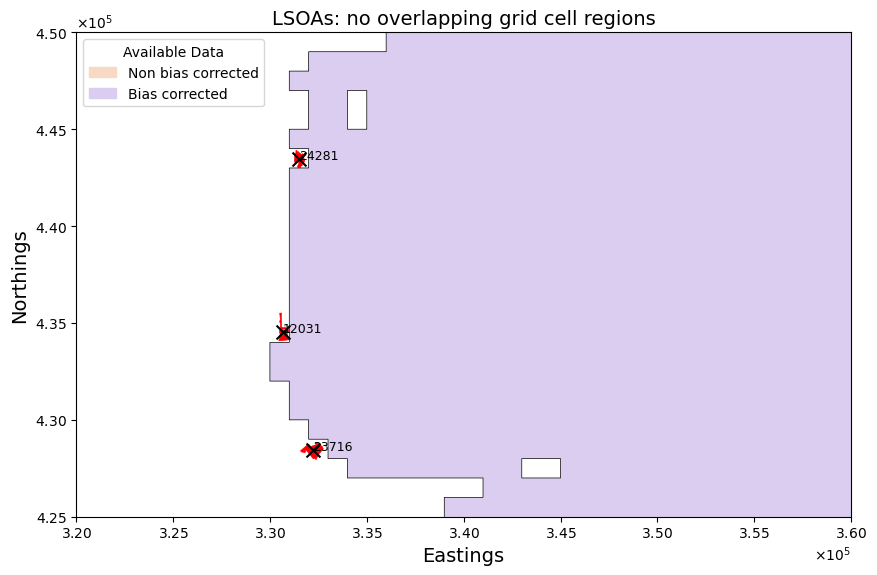

In [14]:
viewbox=[3.2e5, 3.6e5, 4.25e5, 4.5e5]
plotter.plot_no_overlap_locations("lsoa", viewbox)

## Plot region, grid cells, and climate data

* We can plot a region, the overlapping cells, and colour the cells based on the climate data variable values requested.

Cells found: 86


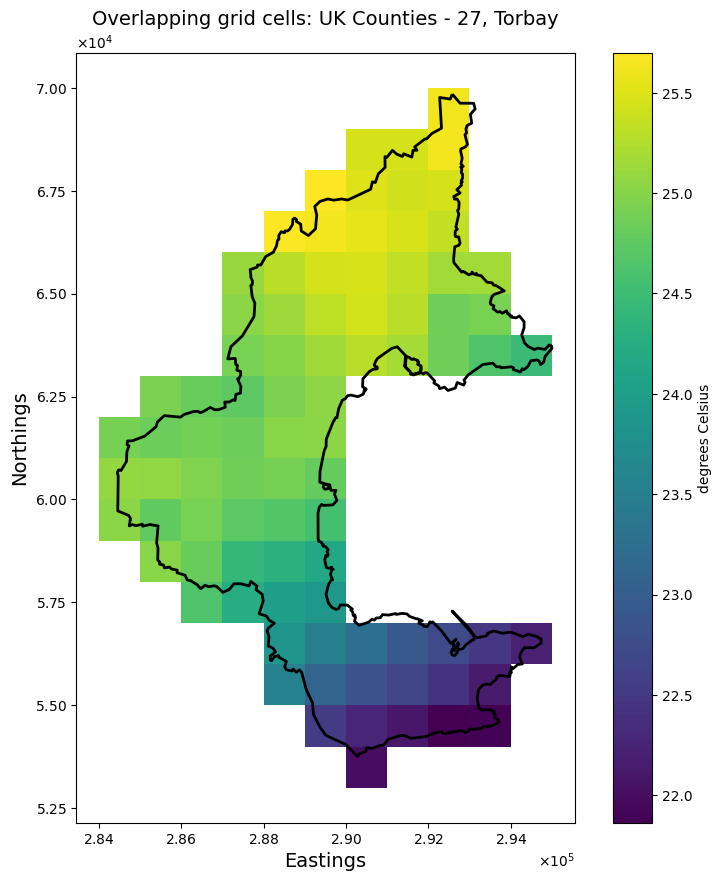

In [15]:
boundary_identifier = "uk_counties"
region_id = 27
rcp = 85
season = "summer"
variable = "tasmax"
decade = 2070

plotter.plot_region_and_overlapping_cells_with_colour(boundary_identifier, region_id, rcp, season, variable, decade)

Cells found: 11


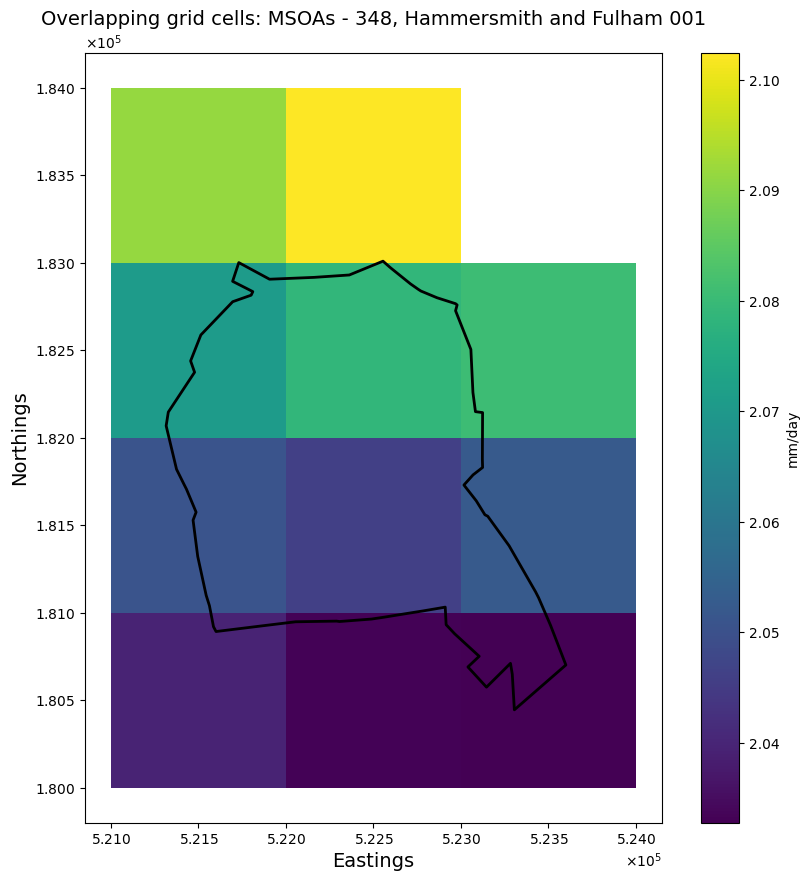

In [16]:
boundary_identifier = "msoa"
region_id = 348
rcp = 85
season = "winter"
variable = "pr"
decade = 2070

plotter.plot_region_and_overlapping_cells_with_colour(boundary_identifier, region_id, rcp, season, variable, decade)

## Plot choropleth maps

* We can also plot all boundary regions coloured/shaded completely by the cached climate variable values.
* This is essentially what is provided in LCAT.
* These are commonly called choropleth maps.

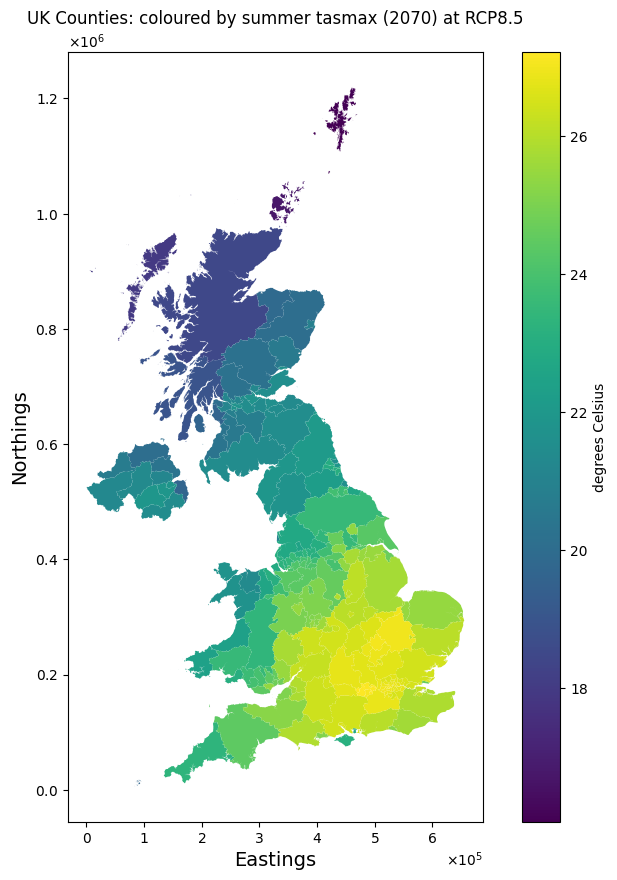

In [17]:
boundary_identifier = "uk_counties"
rcp = 85
season = "summer"
variable = "tasmax"
decade = 2070

plotter.plot_boundary_coloured_by_cache(boundary_identifier, variable, decade, rcp, season)

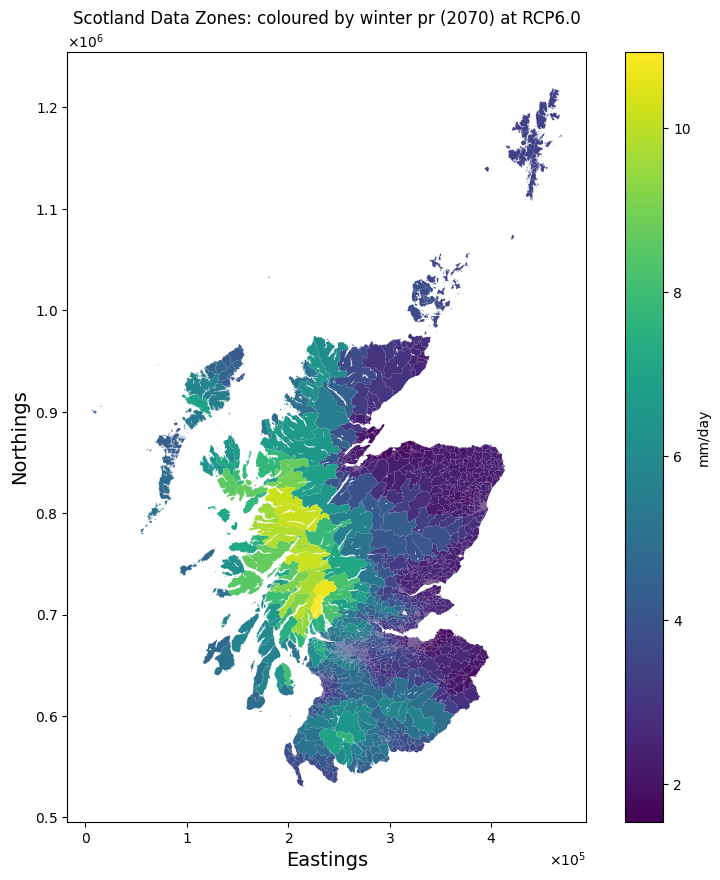

In [18]:
boundary_identifier = "sc_dz"
rcp = 60
season = "winter"
variable = "pr"
decade = 2070
lines = False

plotter.plot_boundary_coloured_by_cache(boundary_identifier, variable, decade, rcp, season, lines)

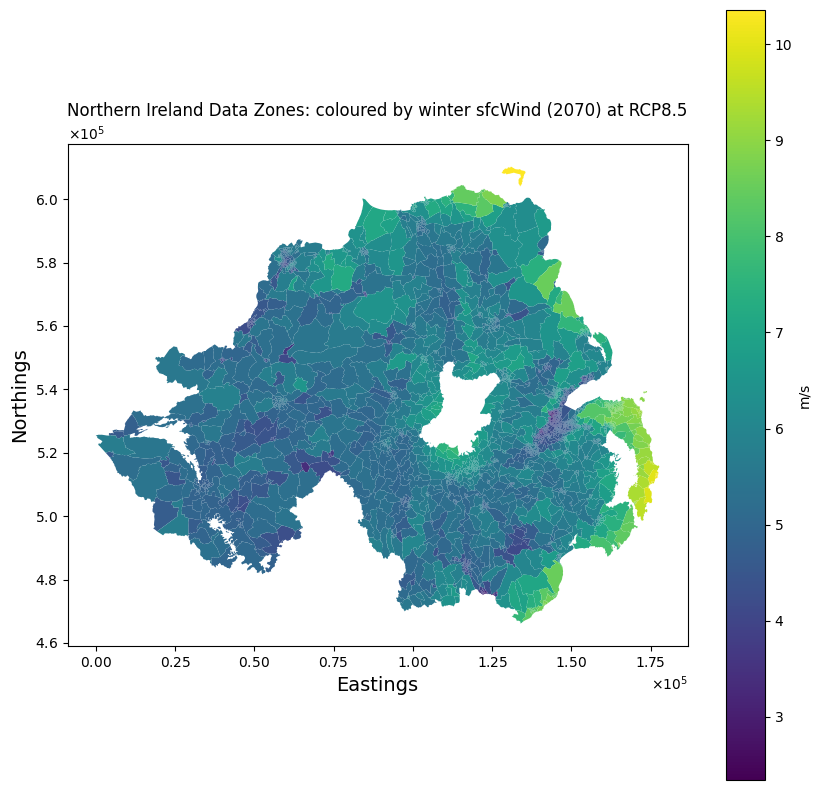

In [19]:
boundary_identifier = "ni_dz"
rcp = 85
season = "winter"
variable = "sfcWind"
decade = 2070
lines = False

plotter.plot_boundary_coloured_by_cache(boundary_identifier, variable, decade, rcp, season, lines)